- 참고링크

https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/

https://wikidocs.net/21694

https://ratsgo.github.io/korean%20linguistics/2017/11/17/modality/

https://tpwkcorqhd.tistory.com/35

https://suy379.tistory.com/159
-> 로지스틱 회귀 하이퍼파라미터 튜닝

# 1. 데이터 분석, 전처리

In [156]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

%matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family = "Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family = font_name)
else:
    print("Unknown system.")

In [157]:
raw = pd.read_csv('../ML_project/data/train.csv')
raw

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...,...
16536,TRAIN_16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,TRAIN_16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,TRAIN_16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,TRAIN_16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


필요한 부분만 추출 (확실성 컬럼)

In [158]:
def just_certainty(raw):
    return raw.drop(["ID","label","유형","극성","시제"], axis=1)

In [159]:
raw = just_certainty(raw)
raw.head()

,문장,확실성
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,확실
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,확실
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,확실


In [160]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16541 entries, 0 to 16540
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      16541 non-null  object
 1   확실성     16541 non-null  object
dtypes: object(2)
memory usage: 258.6+ KB


In [161]:
raw[raw['확실성']=='불확실']

,문장,확실성
12,비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는...,불확실
32,팔각정은 관광도로로 유명한 ＇북악 스카이웨이＇로 인근에 있어 이륜차 운전자들이 즐겨...,불확실
52,한빛소프트는 올해도 리폼 이벤트를 계속 진행할 계획이다.,불확실
62,배우들은 별도의 관광 없이 한국으로 10일(현지시간) 출발할 계획이다.,불확실
79,또한 언론 홍보에 취약한 작은 규모의 공연에 보도자료 릴리즈 및 SNS채널을 활용한...,불확실
...,...,...
16499,최대 5인이 도전할 수 있으며 신화 장신구 제작 재료를 획득할 수 있다.,불확실
16503,"산지 습지, 너덜바위 지대, 떡갈나무숲 등을 지날 수 있다.",불확실
16510,또 원작 ＇히트＇ 이후의 세계관을 담은 MMORPG ＇히트2＇의 경우 원작보다 더욱...,불확실
16525,대학원 정원 규제 완화가 기업 활동에 직접적인 규제가 아님에도 규제 개선 방안에 포...,불확실


<AxesSubplot:xlabel='확실성', ylabel='Count'>

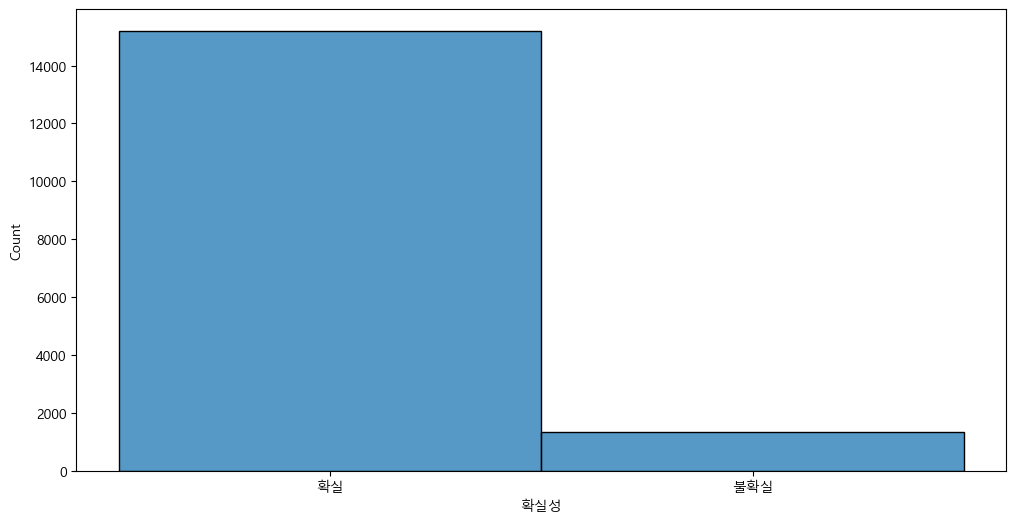

In [162]:
plt.figure(figsize=(12,6))
sns.histplot(raw['확실성'])

In [163]:
len(raw[raw['확실성'] == '확실']), len(raw[raw['확실성'] == '불확실']) 

(15192, 1349)

확실성 문장과 불확실성 문장 데이터 수의 차이가 심하다.

### 확실성 문장과 불확실성 문장에서 많이 나타나는 단어를 살펴보자

- 불확실성 문장
    - -겠- , -을 것이-
    - -ㄴ/ㄹ 듯하-
    - -ㄴ/ㄹ 것 같-
    - -을 법하-
    - -을 수 있-

In [164]:
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt
from collections import Counter
import nltk
import re

okt = Okt()

In [165]:
def apply_re(text):
    text = text.replace('.', ' ')
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub('', text)
    return result

In [166]:
certainty = raw[raw["확실성"] == "확실"]
certainty = certainty.reset_index(drop = True)
certainty

,문장,확실성
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,확실
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,확실
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,확실
...,...,...
15187,"이에 따라 대형 콘서트부터 야외 페스티벌, 실내 공연 등 연이어 오픈 소식이 들려오...",확실
15188,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",확실
15189,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",확실
15190,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,확실


In [167]:
uncertainty = raw[raw["확실성"] == "불확실"]
uncertainty = uncertainty.reset_index(drop = True)
uncertainty

,문장,확실성
0,비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는...,불확실
1,팔각정은 관광도로로 유명한 ＇북악 스카이웨이＇로 인근에 있어 이륜차 운전자들이 즐겨...,불확실
2,한빛소프트는 올해도 리폼 이벤트를 계속 진행할 계획이다.,불확실
3,배우들은 별도의 관광 없이 한국으로 10일(현지시간) 출발할 계획이다.,불확실
4,또한 언론 홍보에 취약한 작은 규모의 공연에 보도자료 릴리즈 및 SNS채널을 활용한...,불확실
...,...,...
1344,최대 5인이 도전할 수 있으며 신화 장신구 제작 재료를 획득할 수 있다.,불확실
1345,"산지 습지, 너덜바위 지대, 떡갈나무숲 등을 지날 수 있다.",불확실
1346,또 원작 ＇히트＇ 이후의 세계관을 담은 MMORPG ＇히트2＇의 경우 원작보다 더욱...,불확실
1347,대학원 정원 규제 완화가 기업 활동에 직접적인 규제가 아님에도 규제 개선 방안에 포...,불확실


In [168]:
uncertainty["문장"][0]

'비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는 곳이 있을 예정이다.'

In [169]:
corpus_un = "".join(uncertainty["문장"].tolist())
corpus_un

'비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는 곳이 있을 예정이다.팔각정은 관광도로로 유명한 ＇북악 스카이웨이＇로 인근에 있어 이륜차 운전자들이 즐겨 찾는 장소로 꼽힌다.한빛소프트는 올해도 리폼 이벤트를 계속 진행할 계획이다.배우들은 별도의 관광 없이 한국으로 10일(현지시간) 출발할 계획이다.또한 언론 홍보에 취약한 작은 규모의 공연에 보도자료 릴리즈 및 SNS채널을 활용한 홍보도 함께 진행할 예정이다.이 문제를 프로이트와 상의하면 아마도 콤플렉스나 부모님과의 관계, 혹은 꿈이나 무의식에서 원인을 찾고자 했을 것이다.지구온난화 때문이라고 한다.쿠르츠 대표가 총리에 취임하면 전 세계 최연소 정부 수반 타이틀도 넘겨받게 된다.제1야당인 자유한국당이 이 제도를 반대하는 이유는 무엇인가요.해상에서는 서해상을 중심으로 돌풍과 함께 천둥·번개가 치는 곳이 있겠다.먼지통을 자동으로 비워주는 기능도 있다.NFT와 부분유료화 게임이 만났을 때 낼 수 있는 기대 효과에 대해서도 논한다.이번에 풀어줄 것처럼 했다가 다음에 또 막아버리면 우리 피해는 더 커진다.박근혜 정권에서 블랙리스트에 올라 지난 2014년 타의로 미국으로 떠난 이 부회장은 해외 엔터테인먼트 업계에서 지속적으로 활동해온 것으로 알려졌다.＂중국 황제는 형편없는 인물＂이라고 헐뜯고 다녔던 것이다.이 또한 아시아 출신 선수로서는 처음이라고 전해진다.이들은 여러 셀럽, 브랜드와 함께 MZ세대 브랜딩과 바이럴 콘텐츠를 기반으로 하는 숏폼 소셜 계정 매니지먼트를 주력으로 한다.한국 금리에 변화가 없다고 하면 다음달 27일 열릴 예정인 FOMC 회의에서 미국이 빅스텝(한번에 0.5%포인트 인상)만 단행해도 미국 금리가 한국보다 0.50~0.75%포인트 높아지는 역전 현상이 현실화하는 것이다.자기주장이 옳아 보인다.또 3월 중순까지 일일퀘스트를 통해 3.1절 주화를 획득하고 태극 런처, 2020년 태극 등장식, 최상급 제작 COOP 남·녀 태극 제1특전단 아바타 등을 가공할 수 있다.같

In [170]:
apply_re(corpus_un)

'비가 내리는 지역에서는 돌풍과 함께 천둥번개가 치고 일부 지역에선 우박이 떨어지는 곳이 있을 예정이다 팔각정은 관광도로로 유명한 북악 스카이웨이로 인근에 있어 이륜차 운전자들이 즐겨 찾는 장소로 꼽힌다 한빛소프트는 올해도 리폼 이벤트를 계속 진행할 계획이다 배우들은 별도의 관광 없이 한국으로 일현지시간 출발할 계획이다 또한 언론 홍보에 취약한 작은 규모의 공연에 보도자료 릴리즈 및 채널을 활용한 홍보도 함께 진행할 예정이다 이 문제를 프로이트와 상의하면 아마도 콤플렉스나 부모님과의 관계 혹은 꿈이나 무의식에서 원인을 찾고자 했을 것이다 지구온난화 때문이라고 한다 쿠르츠 대표가 총리에 취임하면 전 세계 최연소 정부 수반 타이틀도 넘겨받게 된다 제야당인 자유한국당이 이 제도를 반대하는 이유는 무엇인가요 해상에서는 서해상을 중심으로 돌풍과 함께 천둥번개가 치는 곳이 있겠다 먼지통을 자동으로 비워주는 기능도 있다 와 부분유료화 게임이 만났을 때 낼 수 있는 기대 효과에 대해서도 논한다 이번에 풀어줄 것처럼 했다가 다음에 또 막아버리면 우리 피해는 더 커진다 박근혜 정권에서 블랙리스트에 올라 지난 년 타의로 미국으로 떠난 이 부회장은 해외 엔터테인먼트 업계에서 지속적으로 활동해온 것으로 알려졌다 중국 황제는 형편없는 인물이라고 헐뜯고 다녔던 것이다 이 또한 아시아 출신 선수로서는 처음이라고 전해진다 이들은 여러 셀럽 브랜드와 함께 세대 브랜딩과 바이럴 콘텐츠를 기반으로 하는 숏폼 소셜 계정 매니지먼트를 주력으로 한다 한국 금리에 변화가 없다고 하면 다음달 일 열릴 예정인  회의에서 미국이 빅스텝한번에  포인트 인상만 단행해도 미국 금리가 한국보다   포인트 높아지는 역전 현상이 현실화하는 것이다 자기주장이 옳아 보인다 또 월 중순까지 일일퀘스트를 통해  절 주화를 획득하고 태극 런처 년 태극 등장식 최상급 제작  남녀 태극 제특전단 아바타 등을 가공할 수 있다 같은 상황을 보더라도 다르게 생각하는 사람들이 있을 수 있기 때문이다 통상적으로 전염병이 누그러드는 데 개월

In [171]:
morphs_un = okt.morphs(apply_re(corpus_un))
print(morphs_un)

['비', '가', '내리는', '지역', '에서는', '돌풍', '과', '함께', '천둥', '번개', '가', '치고', '일부', '지역', '에선', '우박', '이', '떨어지는', '곳', '이', '있을', '예정', '이다', '팔각정', '은', '관광도로', '로', '유명한', '북악', '스카이웨이', '로', '인근', '에', '있어', '이륜차', '운전자', '들', '이', '즐겨', '찾는', '장소', '로', '꼽힌다', '한빛소프트', '는', '올해', '도', '리폼', '이벤트', '를', '계속', '진행', '할', '계획', '이다', '배우', '들', '은', '별도', '의', '관광', '없이', '한국', '으로', '일', '현', '지', '시간', '출발', '할', '계획', '이다', '또한', '언론', '홍보', '에', '취약', '한', '작은', '규모', '의', '공연', '에', '보도자료', '릴리', '즈', '및', '채널', '을', '활용', '한', '홍보', '도', '함께', '진행', '할', '예정', '이다', '이', '문제', '를', '프로이트', '와', '상의', '하면', '아마도', '콤플렉스', '나', '부모님', '과의', '관계', '혹은', '꿈', '이나', '무의식', '에서', '원인', '을', '찾고자', '했을', '것', '이다', '지구온난화', '때문', '이라고', '한다', '쿠르츠', '대표', '가', '총리', '에', '취임', '하면', '전', '세계', '최연', '소', '정부', '수반', '타이틀', '도', '넘겨받게', '된다', '제', '야당', '인', '자유', '한국', '당', '이', '이', '제도', '를', '반대', '하는', '이유', '는', '무엇', '인가요', '해상', '에서는', '서', '해상', '을', '중심', '으로', '돌풍', '과', '함께', '천둥'

In [172]:
counter_morphs_un = Counter(morphs_un)

In [173]:
counter_morphs_un.most_common(30)

[('을', 919),
 ('이', 850),
 ('에', 599),
 ('의', 560),
 ('를', 510),
 ('가', 391),
 ('으로', 381),
 ('수', 374),
 ('은', 344),
 ('할', 325),
 ('이다', 322),
 ('것', 321),
 ('있다', 285),
 ('는', 282),
 ('한', 232),
 ('에서', 213),
 ('도', 209),
 ('로', 196),
 ('과', 190),
 ('들', 187),
 ('등', 155),
 ('하는', 151),
 ('적', 141),
 ('와', 130),
 ('인', 121),
 ('해', 116),
 ('일', 99),
 ('된다', 96),
 ('하고', 90),
 ('될', 90)]

In [174]:
corpus_cer = "".join(certainty["문장"].tolist())
corpus_cer

'0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이라도 방역 지표가 기준을 충족하면 확진자 격리의무 조정 여부를 검토할 것＂이라고 전했다.정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지 확대한다.서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 차도와 자전거도로는 예외로 하겠다고 입장을 바꾸기도 했다.익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.이같은 변화를 포함해 올해 종부세 과세 대상은 당초 21만4000명에서 12만1000명으로 줄어든다는 게 정부 추산이다.수수꽃다리과로 북한에서 주로 많이 서식한다는 수수꽃다리, 남한의 대표적 라일락으로 털개회나무가 있다.가장 최근에 있었던, OTT 예능 프로그램 출연으로 일약 스타덤에 올랐던 한 인플루언서의 명품 가품 착용 논란도 마찬가지 사례다.이번 서비스에는 네이버가 자체 개발한 초대규모 AI 하이퍼클로바 기술이 적용됐다.이 같은 서울시 방침에 직격탄을 맞게 된 곳이 바로 한남근린공원(한남동 677-1)이다.스탈린에 아부하는 것이 일상이던 권력자들은 스탈린 이후 누가 후계자가 될 것인지를 놓고 온갖 눈치 작전을 벌인다.취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다.최근 50대 이상의 서울 강남 거주자들 중심으로 번지고 있는 국민연금 고액 추후납부(추납), 이들은 평소 국민연금을 내지 않고 있다가 연금수령 시점이 돼서 5000만~1억원의 보험료를 한꺼번에 투척하면서 이득을 취한다.이어 ＂개별 상황에 어떻게 응대해야 할 것인지도 모호한 상황＂이라며 ＂이 같은 부분도 정리 작업이 필요하다＂고 말했다.사우스포게임즈가 개발한 ＇스컬＇의 경우도 지난해 부산인디커넥트 페스티벌, 글로벌인디게임제작경진대회 등을 통해 눈도장을 찍기도 했다.1회 신청 시 1년까지, 보험료 납입기간 중 최대 3회까지 이용할 수 있다.서울 아파

In [175]:
morphs_cer = okt.morphs(apply_re(corpus_cer))

In [176]:
counter_morphs_cer = Counter(morphs_cer)

In [177]:
counter_morphs_cer.most_common(30)

[('을', 11463),
 ('이', 9130),
 ('의', 7413),
 ('에', 7180),
 ('를', 6745),
 ('은', 5337),
 ('는', 4747),
 ('가', 4558),
 ('한', 3665),
 ('으로', 3593),
 ('했다', 3007),
 ('에서', 2775),
 ('로', 2683),
 ('과', 2469),
 ('들', 2297),
 ('것', 2081),
 ('도', 1994),
 ('이다', 1993),
 ('년', 1884),
 ('하는', 1875),
 ('등', 1875),
 ('와', 1733),
 ('적', 1611),
 ('수', 1589),
 ('일', 1496),
 ('인', 1468),
 ('있다', 1413),
 ('다', 1408),
 ('해', 1384),
 ('하고', 1317)]

### 확실한 문장과 불확실한 문장에서 나오는 명사의 빈도를 비교해 보았을 때
- '것','수'라는 단어가 양쪽에서 많이 나온다.
- 문장의 확실성을 분류하기에 감성분석때 처럼의 의미를 갖는 단어는 일부를 제외하고 크게 영향을 미치는 것 같지 않다.
    - ex) 예정, 계획
    - 단어 단위보다는 문장의 서술어 부분에서 차이가 나는 것으로 보인다.

- 확실성 문장: ~이다. ~있다. ~했다.
- 불확실성 문장: ~계획이다. ~예정이다. ~ 수 있다. ~ 것이다. ~수도 있다.
- 이로 인해 문장의 확실성을 나누는 기준이 문장의 추측성(양태)와 밀접한 관련이 있다고 생각하고 분류를 하고자 한다.

In [178]:
last_word_un = []
for sentence in uncertainty["문장"]:
    last_word_un.append(sentence.split(' ')[-1])


last_word_cer = []
for sentence in certainty["문장"]:
    last_word_cer.append(sentence.split(' ')[-1])

In [179]:
last_word_un

['예정이다.',
 '꼽힌다.',
 '계획이다.',
 '계획이다.',
 '예정이다.',
 '것이다.',
 '한다.',
 '된다.',
 '무엇인가요.',
 '있겠다.',
 '있다.',
 '논한다.',
 '커진다.',
 '알려졌다.',
 '것이다.',
 '전해진다.',
 '한다.',
 '것이다.',
 '보인다.',
 '있다.',
 '때문이다.',
 '있다.',
 '있다.',
 '예측해왔다.',
 '예정이다.',
 '것입니다.',
 '있나?＂',
 '있다.',
 '상의했다.',
 '전망된다.',
 '일이다.',
 '주장이다.',
 '이야기이다.',
 '있다.',
 '있다.',
 '보인다.',
 '계획이다.',
 '알려졌다.',
 '달한다.',
 '장원이었다.',
 '보인다.',
 '있습니다.',
 '예정이다.',
 '분석된다.',
 '것이다.',
 '높아진다.',
 '것이다.',
 '말했다.',
 '있다.',
 '믿는다.＂',
 '계획이다.',
 '올까요.',
 '있다.',
 '분석된다.',
 '예정이다.',
 '예정이다.',
 '알려졌다.',
 '있다.',
 '있다.',
 '미지수다.',
 '계획이다.',
 '있다.',
 '된다.',
 '보인다.',
 '건지.',
 '것일까.',
 '셈이다.',
 '알려졌다.',
 '뭘까.',
 '기여해왔다.',
 '예정이다.',
 '있다.',
 '예상된다.',
 '있습니다.',
 '예정이다.',
 '예정이다.',
 '지급한다.',
 '보이겠다.',
 '것이다.',
 '추천받는다.',
 '예정이다.',
 '보인다.',
 '있다.',
 '의심한다.',
 '있다.',
 '수령한다.',
 '예상된다.',
 '있다.',
 '될까.',
 '있다.',
 '것이냐.＂',
 '본다.',
 '계획이다.',
 '예정이다.',
 '듯했다.',
 '예고된다.',
 '있다.',
 '예보됐다.',
 '것인지다.',
 '나온다.',
 '것이다.',
 '셈이다.',
 '것이다.',
 '알려졌다.',
 '것일까.',
 '오류였을까.',
 '계획입니다.＂',
 

In [180]:
last_word_cer

['처음이다.',
 '전했다.',
 '확대한다.',
 '했다.',
 '채운다.',
 '추산이다.',
 '있다.',
 '사례다.',
 '적용됐다.',
 '677-1)이다.',
 '벌인다.',
 '없다.',
 '취한다.',
 '말했다.',
 '했다.',
 '있다.',
 '때문이다.',
 '것이었다.',
 '된다.',
 '차단한다.',
 '했다.',
 '귀띔했다.',
 '기록했다.',
 '비판했다.',
 '밝혔다.',
 '말했다.',
 '버려두었다.',
 '했다.',
 '선호했다.',
 '돋보인다.',
 '주장한다.',
 '성공했다.',
 '작용했다.',
 '액션물이다.',
 '설명했다.',
 '핵심장비이다.',
 '규모다.',
 '아닐까.',
 '소개했다.',
 '중요하다.',
 '조사됐다.',
 '이바지했다.',
 '있다.',
 '중이다.',
 '없었다.',
 '것이다.＂',
 '것이다.',
 '시작했다.',
 '철학이었다.',
 '사람이다.',
 '말했다.',
 '했다.',
 '난도질했다.',
 '있다.',
 '말이다.',
 '준다.',
 '중요하다.',
 '올랐다.',
 '당연했다.',
 '뜻입니다.＂',
 '있다.',
 '없다.',
 '사실이다.',
 '계단이었다.',
 '시작이다.',
 '있게했다.',
 '했다.',
 '되었다.',
 '변경됐습니다.＂',
 '기소됐다.',
 '있다.',
 '있다.',
 '된다.',
 '받았다.',
 '밝혔다.',
 '개발됐다.',
 '것이다.',
 '발생한다.',
 '실력자다.',
 '추천한다.',
 '출시했다.',
 '한다.',
 '경건해진다.',
 '설명했다.',
 '분열적이다.',
 '아니었다.',
 '나왔다.',
 '많다.',
 '내세웠다.',
 '처한다.',
 '주장했다.',
 '있다.',
 '돌렸다.',
 '했다.',
 '피살된다.',
 '한다.',
 '비판했다.',
 '거머쥐었다.',
 '대상이었다.',
 '덧붙였다.',
 'km/ℓ였다.',
 '시나리오다.',
 '붙였다.',
 '전부다.',
 '높다.',


In [181]:
count_last_word_un = Counter(last_word_un)
count_last_word_un.most_common(30)

[('있다.', 278),
 ('예정이다.', 73),
 ('것이다.', 66),
 ('전망이다.', 50),
 ('한다.', 43),
 ('계획이다.', 42),
 ('보인다.', 30),
 ('알려졌다.', 26),
 ('된다.', 24),
 ('예상된다.', 21),
 ('했다.', 19),
 ('방침이다.', 15),
 ('셈이다.', 13),
 ('나온다.', 13),
 ('때문이다.', 12),
 ('전망된다.', 11),
 ('없다.', 10),
 ('있겠다.', 8),
 ('있습니다.', 8),
 ('말했다.', 7),
 ('싶다.', 7),
 ('높다.', 7),
 ('모른다.', 7),
 ('풀이된다.', 6),
 ('것이다.＂', 5),
 ('하다.', 5),
 ('전했다.', 5),
 ('가능하다.', 5),
 ('꼽힌다.', 4),
 ('크다.', 4)]

In [182]:
count_last_word_cer = Counter(last_word_cer)
count_last_word_cer.most_common(30)

[('있다.', 1349),
 ('했다.', 406),
 ('밝혔다.', 346),
 ('말했다.', 336),
 ('한다.', 304),
 ('것이다.', 254),
 ('설명했다.', 159),
 ('된다.', 144),
 ('때문이다.', 139),
 ('있었다.', 113),
 ('없다.', 106),
 ('됐다.', 98),
 ('받았다.', 92),
 ('중이다.', 91),
 ('않았다.', 84),
 ('강조했다.', 82),
 ('전했다.', 72),
 ('예정이다.', 70),
 ('기록했다.', 67),
 ('덧붙였다.', 66),
 ('올랐다.', 61),
 ('제공한다.', 59),
 ('계획이다.', 57),
 ('알려졌다.', 57),
 ('나타났다.', 57),
 ('가능하다.', 54),
 ('나온다.', 53),
 ('아니다.', 52),
 ('없었다.', 47),
 ('시작했다.', 43)]

In [183]:
x_cer = [tu[0] for tu in count_last_word_cer.most_common(30)]
y_cer = [tu[1] for tu in count_last_word_cer.most_common(30)]

x_un = [tu[0] for tu in count_last_word_un.most_common(30)]
y_un = [tu[1] for tu in count_last_word_un.most_common(30)]

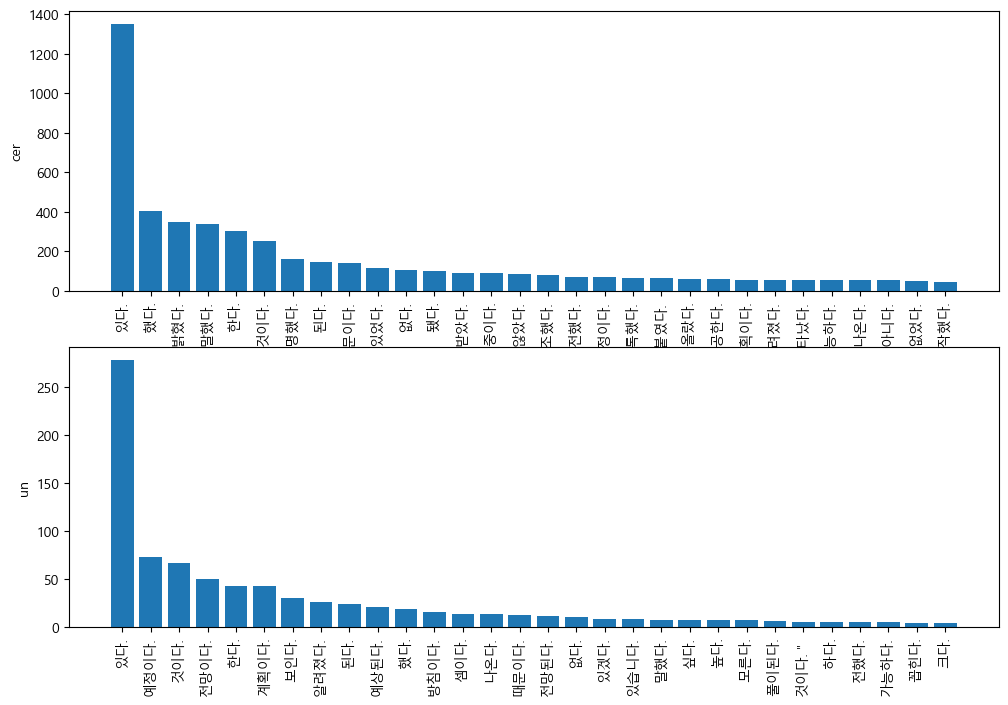

In [184]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(211)
plt.bar(x_cer, y_cer)
plt.xticks(rotation=90)
plt.ylabel("cer")

fig.add_subplot(212)
plt.bar(x_un, y_un)
plt.xticks(rotation=90)
plt.ylabel("un")

plt.show()

In [185]:
last_word_un = []
for sentence in uncertainty["문장"]:
    last_word_un.append(sentence.split(' ')[-2]+sentence.split(' ')[-1])


last_word_cer = []
for sentence in certainty["문장"]:
    last_word_cer.append(sentence.split(' ')[-2]+sentence.split(' ')[-1])

In [186]:
count_last_word_un = Counter(last_word_un)
count_last_word_un.most_common(30)

[('수있다.', 194),
 ('수도있다.', 28),
 ('것으로알려졌다.', 25),
 ('것으로보인다.', 22),
 ('것으로예상된다.', 15),
 ('것으로전망된다.', 11),
 ('곳이있겠다.', 7),
 ('가능성이높다.', 6),
 ('있을것이다.', 6),
 ('가능성도있다.', 6),
 ('것으로풀이된다.', 5),
 ('수있습니다.', 5),
 ('있다는것이다.', 5),
 ('있기때문이다.', 4),
 ('추진할계획이다.', 4),
 ('수없다.', 4),
 ('될전망이다.', 4),
 ('알려져있다.', 4),
 ('진행할예정이다.', 3),
 ('선보일예정이다.', 3),
 ('진행될예정이다.', 3),
 ('제공할예정이다.', 3),
 ('나오고있다.', 3),
 ('보고있다.', 3),
 ('것으로관측된다.', 3),
 ('가능성이크다.', 3),
 ('사용될예정이다.', 3),
 ('것으로기대된다.', 3),
 ('이유는무엇일까.', 3),
 ('있을예정이다.', 2)]

In [187]:
count_last_word_cer = Counter(last_word_cer)
count_last_word_cer.most_common(20)

[('수있다.', 187),
 ('바있다.', 88),
 ('것으로알려졌다.', 48),
 ('것으로나타났다.', 44),
 ('것＂이라고말했다.', 41),
 ('있다＂고말했다.', 35),
 ('수없다.', 33),
 ('받고있다.', 23),
 ('수있었다.', 20),
 ('것이특징이다.', 20),
 ('있기때문이다.', 19),
 ('있다＂고설명했다.', 17),
 ('한다＂고말했다.', 17),
 ('것으로전해졌다.', 15),
 ('하고있다.', 15),
 ('것으로보인다.', 15),
 ('보이고있다.', 14),
 ('높아지고있다.', 13),
 ('진행중이다.', 13),
 ('수밖에없다.', 12)]

In [188]:
x_cer = [tu[0] for tu in count_last_word_cer.most_common(30)]
y_cer = [tu[1] for tu in count_last_word_cer.most_common(30)]

x_un = [tu[0] for tu in count_last_word_un.most_common(30)]
y_un = [tu[1] for tu in count_last_word_un.most_common(30)]

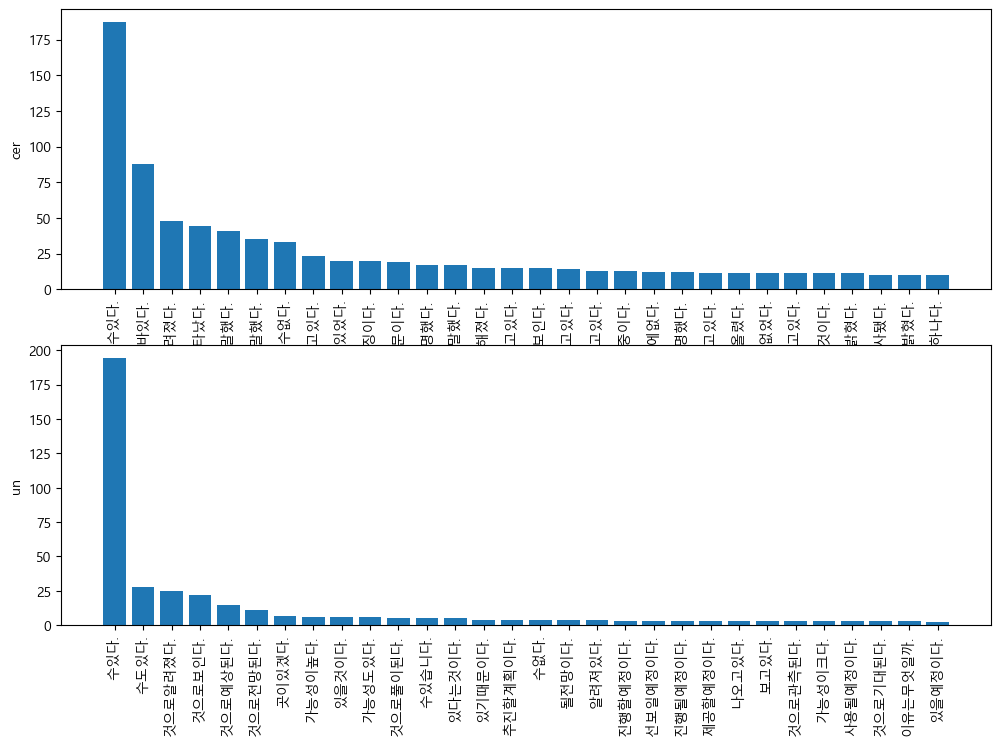

In [189]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(211)
plt.bar(x_cer, y_cer)
plt.xticks(rotation=90)
plt.ylabel("cer")

fig.add_subplot(212)
plt.bar(x_un, y_un)
plt.xticks(rotation=90)
plt.ylabel("un")

plt.show()

In [190]:
both_in = []
for word in last_word_un:
    if word in last_word_cer:
        both_in.append(word)

In [191]:
both_in

['곳이있겠다.',
 '기능도있다.',
 '것으로알려졌다.',
 '수있다.',
 '있기때문이다.',
 '수있다.',
 '수있다.',
 '것으로전망된다.',
 '없는일이다.',
 '수있다.',
 '수도있다.',
 '것으로보인다.',
 '것으로알려졌다.',
 '것으로보인다.',
 '선보일예정이다.',
 '것으로분석된다.',
 '가능성이높아진다.',
 '못할것이다.',
 '있다＂고말했다.',
 '수있다.',
 '필요가있다.',
 '것으로분석된다.',
 '진행될예정이다.',
 '것으로알려졌다.',
 '수있다.',
 '수있다.',
 '수있다.',
 '것으로알려졌다.',
 '제공할예정이다.',
 '수있다.',
 '것으로예상된다.',
 '제공할예정이다.',
 '것으로보인다.',
 '수있다.',
 '내놓고있다.',
 '수있다.',
 '수있다.',
 '것이라고본다.',
 '수있다.',
 '것으로알려졌다.',
 '것으로전망된다.',
 '나오고있다.',
 '수있다.',
 '사례로꼽힌다.',
 '것으로보인다.',
 '리없다.',
 '탄생할지주목된다.',
 '수있었다.',
 '수있다.',
 '보고있다.',
 '진행될예정이다.',
 '가능성이높다.',
 '전하기도했다.',
 '곳이있겠다.',
 '수있다.',
 '것으로알려졌다.',
 '수있다.',
 '조금높겠다.',
 '있어보인다.',
 '가능성이높다.',
 '수있다.',
 '수있다.',
 '가능성이크다.',
 '수있다.',
 '수있다.',
 '있는것이다.',
 '위한치료다.',
 '있게됐다.',
 '것으로보인다.',
 '것으로예상된다.',
 '수밖에없다.',
 '수있다.',
 '수있다.',
 '것으로보인다.',
 '있다＂고전망했다.',
 '밝힐예정이다.',
 '수준으로예상됐다.',
 '수있다.',
 '내다보고있다.',
 '보고있다.',
 '있을것이다.',
 '수있다.',
 '수있다.',
 '수있다.',
 '가능성이높다.',
 '수있다.',
 '되기도한다.',
 '나갈계획이다.',
 '수있다.',
 '수있다.',
 '수있다.',
 '것

In [192]:
count_both_in = Counter(both_in)
count_both_in.most_common()

[('수있다.', 194),
 ('수도있다.', 28),
 ('것으로알려졌다.', 25),
 ('것으로보인다.', 22),
 ('것으로예상된다.', 15),
 ('것으로전망된다.', 11),
 ('곳이있겠다.', 7),
 ('가능성이높다.', 6),
 ('있을것이다.', 6),
 ('가능성도있다.', 6),
 ('것으로풀이된다.', 5),
 ('수있습니다.', 5),
 ('있다는것이다.', 5),
 ('있기때문이다.', 4),
 ('추진할계획이다.', 4),
 ('수없다.', 4),
 ('될전망이다.', 4),
 ('알려져있다.', 4),
 ('선보일예정이다.', 3),
 ('진행될예정이다.', 3),
 ('제공할예정이다.', 3),
 ('나오고있다.', 3),
 ('보고있다.', 3),
 ('가능성이크다.', 3),
 ('것으로기대된다.', 3),
 ('것으로분석된다.', 2),
 ('있다＂고말했다.', 2),
 ('수있었다.', 2),
 ('수밖에없다.', 2),
 ('밝힐예정이다.', 2),
 ('수준으로예상됐다.', 2),
 ('내다보고있다.', 2),
 ('되기도한다.', 2),
 ('나갈계획이다.', 2),
 ('늘어날것이다.', 2),
 ('확대할예정이다.', 2),
 ('것같습니다.', 2),
 ('것으로전망했다.', 2),
 ('이어갈예정이다.', 2),
 ('할예정이다.', 2),
 ('지적이나온다.', 2),
 ('것으로봤다.', 2),
 ('될것이다.', 2),
 ('주의해야한다.', 2),
 ('수있다.＂', 2),
 ('있는셈이다.', 2),
 ('있게된다.', 2),
 ('것으로짐작된다.', 2),
 ('전망이나온다.', 2),
 ('않아도된다.', 2),
 ('기능도있다.', 1),
 ('없는일이다.', 1),
 ('가능성이높아진다.', 1),
 ('못할것이다.', 1),
 ('필요가있다.', 1),
 ('내놓고있다.', 1),
 ('것이라고본다.', 1),
 ('사례로꼽힌다.', 1),
 ('리없다.', 1),
 ('탄생할지주목된

In [193]:
last_word_un = []
for sentence in uncertainty["문장"]:
    if sentence.split(' ')[-1] == '있다.':
        last_word_un.append(sentence.split(' ')[-2] + sentence.split(' ')[-1])
    else:
        last_word_un.append(sentence.split(' ')[-1])


last_word_cer = []
for sentence in certainty["문장"]:
    if sentence.split(' ')[-1] == '있다.':
        last_word_cer.append(sentence.split(' ')[-2] + sentence.split(' ')[-1])
    else:
        last_word_cer.append(sentence.split(' ')[-1])

In [194]:
count_last_word_un = Counter(last_word_un)
count_last_word_un.most_common(30)

[('수있다.', 194),
 ('예정이다.', 73),
 ('것이다.', 66),
 ('전망이다.', 50),
 ('한다.', 43),
 ('계획이다.', 42),
 ('보인다.', 30),
 ('수도있다.', 28),
 ('알려졌다.', 26),
 ('된다.', 24),
 ('예상된다.', 21),
 ('했다.', 19),
 ('방침이다.', 15),
 ('셈이다.', 13),
 ('나온다.', 13),
 ('때문이다.', 12),
 ('전망된다.', 11),
 ('없다.', 10),
 ('있겠다.', 8),
 ('있습니다.', 8),
 ('말했다.', 7),
 ('싶다.', 7),
 ('높다.', 7),
 ('모른다.', 7),
 ('풀이된다.', 6),
 ('가능성도있다.', 6),
 ('것이다.＂', 5),
 ('하다.', 5),
 ('전했다.', 5),
 ('가능하다.', 5)]

In [195]:
count_last_word_cer = Counter(last_word_cer)
count_last_word_cer.most_common(20)

[('했다.', 406),
 ('밝혔다.', 346),
 ('말했다.', 336),
 ('한다.', 304),
 ('것이다.', 254),
 ('수있다.', 187),
 ('설명했다.', 159),
 ('된다.', 144),
 ('때문이다.', 139),
 ('있었다.', 113),
 ('없다.', 106),
 ('됐다.', 98),
 ('받았다.', 92),
 ('중이다.', 91),
 ('바있다.', 88),
 ('않았다.', 84),
 ('강조했다.', 82),
 ('전했다.', 72),
 ('예정이다.', 70),
 ('기록했다.', 67)]

In [196]:
x_cer = [tu[0] for tu in count_last_word_cer.most_common(30)]
y_cer = [tu[1] for tu in count_last_word_cer.most_common(30)]

x_un = [tu[0] for tu in count_last_word_un.most_common(30)]
y_un = [tu[1] for tu in count_last_word_un.most_common(30)]

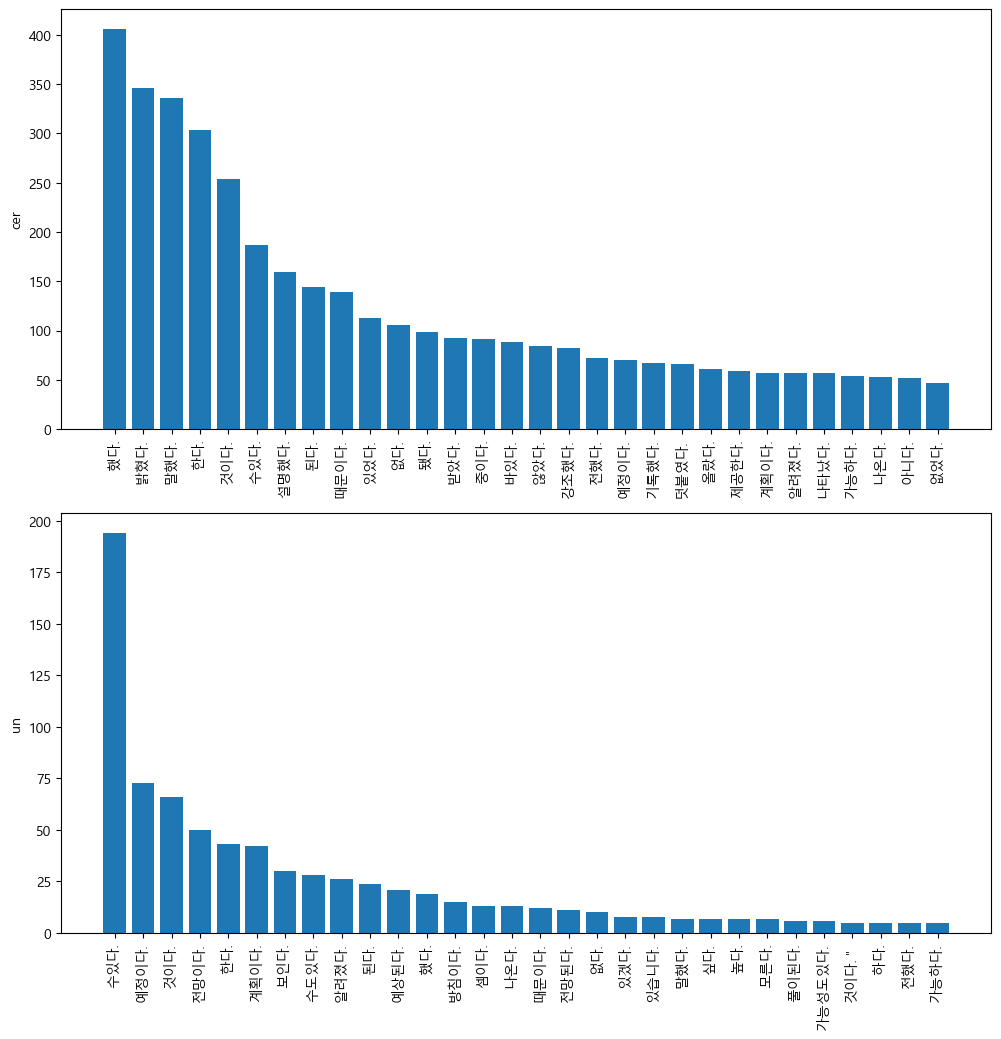

In [197]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(211)
plt.bar(x_cer, y_cer)
plt.xticks(rotation=90)
plt.ylabel("cer")

fig.add_subplot(212)
plt.bar(x_un, y_un)
plt.xticks(rotation=90)
plt.ylabel("un")

plt.show()

---

- 불확실성 문장
    - -겠- , -을 것이-
    - -ㄴ/ㄹ 듯하-
    - -ㄴ/ㄹ 것 같-
    - -을 법하-
    - -을 수 있-

In [198]:
text = certainty["문장"][1331]
text

'그는 ＂개인 휴대전화로 민원이나 주민의 바람, 의견을 수렴하고 하루 평균 20~30건을 직접 답장하며 소통하고 있다＂고 말했다.'

### 서술 부분 끝에서 2어절을 집중으로 분석해보자.
- TfidfVectorizer
- LogisticRegression

In [199]:
def last_two_word(sentence):
    result = sentence.split(" ")[-2:]
    return result[0] + ' ' + result[1]

In [200]:
def apply_re(text):
    text = text.replace('.', ' ')
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub('', text)
    return result

In [201]:
text = uncertainty["문장"][5]
text

'이 문제를 프로이트와 상의하면 아마도 콤플렉스나 부모님과의 관계, 혹은 꿈이나 무의식에서 원인을 찾고자 했을 것이다.'

In [202]:
last_two_word(text)

'했을 것이다.'

In [203]:
raw["문장"] = raw["문장"].apply(last_two_word)

In [204]:
raw["문장"] = raw["문장"].apply(apply_re)

In [205]:
raw["문장"].values

array(['만에 처음이다 ', '것이라고 전했다 ', '까지 확대한다 ', ..., '아닌가라고 꼬집었다 ',
       '있도록 구성됐다 ', '목민심서의 내용이다 '], dtype=object)

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')
X = vectorizer.fit_transform(raw["문장"].values)

In [207]:
X.shape

(16541, 13300)

In [208]:
vectorizer.get_feature_names_out()

array(['가게에', '가격', '가격으로', ..., '힘이다', '힘인', '힘차게'], dtype=object)

In [209]:
corpus_X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
corpus_X

,가게에,가격,가격으로,가격은,가격이,가격이다,가격인상에,가격인상이다,가격해,가결했다,...,힘쓰겠다고,힘쓰고,힘쓴다,힘쓸,힘으로,힘을,힘이,힘이다,힘인,힘차게
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
raw["le"] = le.fit_transform(raw["확실성"])
raw.head(1)

,문장,확실성,le
0,만에 처음이다,확실,1


In [211]:
from sklearn.model_selection import train_test_split

y = raw["le"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=13)

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=13)
lr.fit(X_train,y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9260882708585247
Test Acc :  0.9220308250226654


In [213]:
X_train.shape

(13232, 13300)

In [214]:
X_test.shape

(3309, 13300)

# Test data로 해보기

In [215]:
test_data = pd.read_csv('../ML_project/data/test.csv')
test_data

,ID,문장
0,TEST_0000,"장욱진의 ＇가족＇은 허물 없는 가족애를, 처음 공개되는 정약용의 ＇정효자전＇과 ＇정..."
1,TEST_0001,"조지 W 부시, 버락 오바마 전 대통령도 전쟁 위험 때문에 버린 카드다."
2,TEST_0002,지난해 1분기 128억원이었던 영업이익이 올해 1분기 505억원으로 급증했다.
3,TEST_0003,수상 작가와 맺으려던 계약서 내용 가운데 일부가 ＇독소 조항＇으로 해석돼 수정을 요...
4,TEST_0004,결국 최근 KDB산업은행은 대규모 손실 위기에 닥친 에어부산에 140억원 금융지원을...
...,...,...
7085,TEST_7085,"2020 세계국가편람 모바일 앱은 세계 216개국의 국가개황과 주요 경제지표, 사회..."
7086,TEST_7086,탈세계화 징후들이 반갑지 않은 이유다.
7087,TEST_7087,"틱톡은 6월 ＇인터넷 안전의 달＇을 맞아 올바른 개인정보 보호 관리 방법, 앱 내 ..."
7088,TEST_7088,만약 3개월 간 채굴자들의 투표를 거쳐 2/3 이상의 해시파워가 ＇채굴세＇ 도입에 ...


In [216]:
X_real_test = test_data["문장"].apply(last_two_word)
X_real_test

0            서예 작품이다.
1             버린 카드다.
2       505억원으로 급증했다.
3          수록을 거부해서다.
4       811.8%로 급등했다.
            ...      
7085       제공하는 서비스다.
7086          않은 이유다.
7087       캠페인을 전개한다.
7088       포함시켰으면 한다.
7089        광경을 지켜봤다.
Name: 문장, Length: 7090, dtype: object

In [217]:
X_real_test = X_real_test.apply(apply_re)

In [218]:
X_real_test.values

array(['서예 작품이다 ', '버린 카드다 ', '억원으로 급증했다 ', ..., '캠페인을 전개한다 ',
       '포함시켰으면 한다 ', '광경을 지켜봤다 '], dtype=object)

In [219]:
X_real_test_vec = vectorizer.transform(X_real_test.values)

In [220]:
X.shape

(16541, 13300)

In [221]:
X_real_test_vec.shape

(7090, 13300)

In [222]:
y_pred_real_test = lr.predict(X_real_test_vec)
y_pred_real_test

array([1, 1, 1, ..., 1, 1, 1])

---

---

---

In [223]:
uncertainty["문장"][199]

'이번 성금은 코로나19 확산으로 어려움에 빠진 지역의 피해 복구와 의료 활동에 사용될 예정이다.'

In [224]:
i_said = "아는 것이 힘이다."
you_said = "아는 것이 힘인 것으로 보인다."
he_said = "너는 나의 영원한 친구일 계획이다."

In [225]:
i_said_pp = apply_re(last_two_word(i_said))
you_said_pp = apply_re(last_two_word(you_said))
he_said_pp = apply_re(last_two_word(he_said))

In [226]:
i_said_vec = vectorizer.transform([i_said_pp])
you_said_vec = vectorizer.transform([you_said_pp])
he_said_vec = vectorizer.transform([he_said_pp])

In [227]:
print(f"i_said : {lr.predict(i_said_vec)}")
print(f"you_said: {lr.predict(you_said_vec)}")
print(f"he_said: {lr.predict(he_said_vec)}")

i_said : [1]
you_said: [0]
he_said: [0]


### 도대체 뭐가 불확실한거냐

---

### 문제점
- 확실성 데이터와 불확실성 데이터 양의 차이가 너무 커서 정확도가 높지만 신뢰할 수 없다.
- 문장의 뒤 2어절을 끊었지만 이것 또한 잘 식별해내지 못한다. (위의 사항과 중복되는 문제)

### 시도해보아야 할 점
- 확실성 데이터와 불확실성 데이터의 양을 맞춰서 fit해보기.
- 문장의 뒤 3어절, 4어절 fit한 모델과 비교해보기.

In [228]:
# positive_random_idx = df[df['y']==1].sample(275, random_state=12).index.tolist()
# negative_random_idx = df[df['y']==0].sample(275, random_state=12).index.tolist()

# random_idx = positive_random_idx + negative_random_idx
# x = tf_idf_vect[random_idx]
# y = df['y'][random_idx]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [229]:
raw_data = pd.read_csv("../ML_project/data/train.csv")
raw_data

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...,...
16536,TRAIN_16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,TRAIN_16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,TRAIN_16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,TRAIN_16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


In [230]:
raw_data = raw_data.drop(["ID","label"], axis=1)
raw_data

,문장,유형,극성,시제,확실성
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실
...,...,...,...,...,...
16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실
16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실
16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실
16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실


In [231]:
def apply_re(text):
    text = text.replace('.', ' ')
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub('', text)
    return result

In [232]:
def last_two_word(sentence):
    result = sentence.split(" ")[-2:]
    return result[0] + ' ' + result[1]

In [233]:
len(raw_data[raw_data["확실성"] == "확실"])

15192

In [234]:
len(raw_data[raw_data["확실성"] == "불확실"])

1349

In [235]:
raw_data_cer_sample = raw_data[raw_data["확실성"] == "확실"].sample(1349, random_state=13)

In [236]:
raw_data_un_sample = raw_data[raw_data["확실성"] == "불확실"]

In [237]:
len(raw_data_cer_sample)

1349

In [238]:
len(raw_data_un_sample)

1349

In [239]:
raw_data_sample = pd.concat([raw_data_cer_sample, raw_data_un_sample])

In [240]:
raw_data_sample

,문장,유형,극성,시제,확실성
12986,"현재 블랙이글스가 운용중인 기종은 T-50B, 한국항공우주산업㈜에서 제작한 초음속 ...",사실형,긍정,현재,확실
8120,그리고 애매한 일반론을 고수하라거나 상대 후보의 성추문이나 부정부패를 적절히 활용하...,사실형,긍정,현재,확실
9420,"디지털 시대가 가속화되고 있지만, 인간 뇌의 구조와 기능은 수십만 년 전 그대로이다.",사실형,긍정,현재,확실
13298,전라남도는 2022년 개교하는 한전공대와 방사광 가속기를 연계해 세계적인 산학연 클...,사실형,긍정,현재,확실
4283,장영실을 ＇너드＇(과학 등 특정 분야에 몰입해 사회성이 떨어지는 사람)처럼 그리는 ...,추론형,긍정,현재,확실
...,...,...,...,...,...
16499,최대 5인이 도전할 수 있으며 신화 장신구 제작 재료를 획득할 수 있다.,사실형,긍정,미래,불확실
16503,"산지 습지, 너덜바위 지대, 떡갈나무숲 등을 지날 수 있다.",사실형,긍정,현재,불확실
16510,또 원작 ＇히트＇ 이후의 세계관을 담은 MMORPG ＇히트2＇의 경우 원작보다 더욱...,예측형,긍정,현재,불확실
16525,대학원 정원 규제 완화가 기업 활동에 직접적인 규제가 아님에도 규제 개선 방안에 포...,사실형,긍정,현재,불확실


In [241]:
len(raw_data_sample)

2698

In [242]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

le = LabelEncoder()
raw_data_sample["y"] = le.fit_transform(raw_data_sample["확실성"])

In [243]:
raw_data_sample

,문장,유형,극성,시제,확실성,y
12986,"현재 블랙이글스가 운용중인 기종은 T-50B, 한국항공우주산업㈜에서 제작한 초음속 ...",사실형,긍정,현재,확실,1
8120,그리고 애매한 일반론을 고수하라거나 상대 후보의 성추문이나 부정부패를 적절히 활용하...,사실형,긍정,현재,확실,1
9420,"디지털 시대가 가속화되고 있지만, 인간 뇌의 구조와 기능은 수십만 년 전 그대로이다.",사실형,긍정,현재,확실,1
13298,전라남도는 2022년 개교하는 한전공대와 방사광 가속기를 연계해 세계적인 산학연 클...,사실형,긍정,현재,확실,1
4283,장영실을 ＇너드＇(과학 등 특정 분야에 몰입해 사회성이 떨어지는 사람)처럼 그리는 ...,추론형,긍정,현재,확실,1
...,...,...,...,...,...,...
16499,최대 5인이 도전할 수 있으며 신화 장신구 제작 재료를 획득할 수 있다.,사실형,긍정,미래,불확실,0
16503,"산지 습지, 너덜바위 지대, 떡갈나무숲 등을 지날 수 있다.",사실형,긍정,현재,불확실,0
16510,또 원작 ＇히트＇ 이후의 세계관을 담은 MMORPG ＇히트2＇의 경우 원작보다 더욱...,예측형,긍정,현재,불확실,0
16525,대학원 정원 규제 완화가 기업 활동에 직접적인 규제가 아님에도 규제 개선 방안에 포...,사실형,긍정,현재,불확실,0


In [244]:
raw_data_sample["문장"].apply(last_two_word).apply(apply_re).values

array(['조종특성을 가졌다 ', '활용하라 이야기한다 ', '전 그대로이다 ', ..., '설명할 예정이다 ',
       '반영됐다는 분석이다 ', '있도록 구성됐다 '], dtype=object)

In [245]:
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')
X = vectorizer.fit_transform(raw_data_sample["문장"].apply(last_two_word).apply(apply_re).values)

In [246]:
X.shape

(2698, 2742)

In [247]:
y = raw_data_sample["y"].values

In [248]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y,random_state=13)

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression(random_state=13)
lr.fit(X_train,y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))
print('Train f1 : ', f1_score(y_train, y_pred_tr))
print('Test f1 : ', f1_score(y_test, y_pred_test))

Train Acc :  0.833415719228868
Test Acc :  0.7096296296296296
Train f1 :  0.8479927830401444
Test f1 :  0.7518987341772152


### 샘플의 개수를 맞춰서 fit을 시켜보니 정확도가 떨어졌다.
- 정확도를 더 높이기 위해 어떤 조치를 취해야 할까?
    - 먼저 3어절을 끊어서 X데이터로 사용해보자.

In [250]:
def last_three_word(sentence):
    result = sentence.split(" ")
    if len(result) >= 3:
        result = result[-3:]
    else:
        return " ".join(result)
    return result[0] + ' ' + result[1] + ' ' + result[2]

In [251]:
X = vectorizer.fit_transform(raw_data_sample["문장"].apply(last_three_word).apply(apply_re).values)

In [252]:
X.shape

(2698, 4497)

In [253]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=13)

In [254]:
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))
print('Train f1 : ', f1_score(y_train, y_pred_tr))
print('Test f1 : ', f1_score(y_test, y_pred_test))

Train Acc :  0.9055857637172516
Test Acc :  0.7066666666666667
Train f1 :  0.9077740222114921
Test f1 :  0.7455012853470437


### 3어절을 끊어본 결과 정확도는 올라갔지만 f1은 다소 떨어진 것을 볼 수 있다.
- train의 정확도가 올라간 것은 과적합되었기 때문이라고 생각한다.

### 4어절은 어떨까?

In [255]:
def last_four_word(sentence):
    result = sentence.split(" ")
    if len(result) >= 4:
        result = result[-4:]
    else:
        return " ".join(result)
    return result[0] + ' ' + result[1] + ' ' + result[2]

In [256]:
X = vectorizer.fit_transform(raw_data_sample["문장"].apply(last_four_word).apply(apply_re).values)

In [257]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=13)

lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))
print('Train f1 : ', f1_score(y_train, y_pred_tr))
print('Test f1 : ', f1_score(y_test, y_pred_test))

Train Acc :  0.972318339100346
Test Acc :  0.6385185185185185
Train f1 :  0.9722497522299307
Test f1 :  0.698019801980198


### 역시 글자 종류가 늘어날수록 분류의 기준이 넓어지기 때문에 정확도가 떨어진다. 그렇다면 끝 어절은 2어절이 적당한 것일까? 아니면 다른 방법이?

- 데이터를 늘려볼까?

In [258]:
example = "말씀 중 죄송합니다만 우리 흥민이 절대 월드클래스 아닙니다."

In [259]:
apply_re(last_two_word(example))

'월드클래스 아닙니다 '

In [260]:
vec = TfidfVectorizer(min_df=1, decode_error='ignore')

In [261]:
example_vec = vec.fit_transform(['월드클래스 아닙니다 '])

In [262]:
example_vec.shape

(1, 2)

In [263]:
example_vec.getrow

<bound method csr_matrix.getrow of <1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>>

---

# 중간 점검 피드백
- 비교하는 형식 사용할 것! -> 끝 2어절만 나누어서 했는데 통으로도 해볼것!

### 끝 2어절이 아닌, 통으로 해보기
불균형이 심하기때문에 확실성 데이터를 3000개, 불확실성 데이터를 1349개로 맞춰준다.

In [264]:
raw_data_cer_sample = raw_data[raw_data["확실성"] == "확실"].sample(3000, random_state=13)
raw_data_un_sample = raw_data[raw_data["확실성"] == "불확실"]
raw_data_sample = pd.concat([raw_data_cer_sample, raw_data_un_sample])

In [265]:
len(raw_data_sample), len(raw_data_cer_sample), len(raw_data_un_sample)

(4349, 3000, 1349)

In [266]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

le = LabelEncoder()
raw_data_sample["y"] = le.fit_transform(raw_data_sample["확실성"])

In [267]:
raw_data_sample.head()

,문장,유형,극성,시제,확실성,y
12986,"현재 블랙이글스가 운용중인 기종은 T-50B, 한국항공우주산업㈜에서 제작한 초음속 ...",사실형,긍정,현재,확실,1
8120,그리고 애매한 일반론을 고수하라거나 상대 후보의 성추문이나 부정부패를 적절히 활용하...,사실형,긍정,현재,확실,1
9420,"디지털 시대가 가속화되고 있지만, 인간 뇌의 구조와 기능은 수십만 년 전 그대로이다.",사실형,긍정,현재,확실,1
13298,전라남도는 2022년 개교하는 한전공대와 방사광 가속기를 연계해 세계적인 산학연 클...,사실형,긍정,현재,확실,1
4283,장영실을 ＇너드＇(과학 등 특정 분야에 몰입해 사회성이 떨어지는 사람)처럼 그리는 ...,추론형,긍정,현재,확실,1


In [268]:
len(raw_data_sample)

4349

In [269]:
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')
X = vectorizer.fit_transform(raw_data_sample["문장"].apply(apply_re).values)

In [270]:
y = raw_data_sample["y"].values

In [271]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=13)

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {'C':[0.01, 0.1,1,5,10], 'max_iter': [200,500,1000]}

skfold = StratifiedKFold(n_splits=5)
lr = LogisticRegression(random_state=13)
grid = GridSearchCV(lr, params,scoring='roc_auc' , cv=skfold)

In [273]:
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'max_iter': 200}
0.7826105318114068


In [274]:
score_df = pd.DataFrame(grid.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'C': 0.01, 'max_iter': 200}",13,0.769868
1,"{'C': 0.01, 'max_iter': 500}",13,0.769868
2,"{'C': 0.01, 'max_iter': 1000}",13,0.769868
3,"{'C': 0.1, 'max_iter': 200}",10,0.771479
4,"{'C': 0.1, 'max_iter': 500}",10,0.771479
5,"{'C': 0.1, 'max_iter': 1000}",10,0.771479
6,"{'C': 1, 'max_iter': 200}",7,0.779815
7,"{'C': 1, 'max_iter': 500}",7,0.779815
8,"{'C': 1, 'max_iter': 1000}",7,0.779815
9,"{'C': 5, 'max_iter': 200}",1,0.782611


In [275]:
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, recall_score)

y_pred_train = grid.best_estimator_.predict(X_train)
y_pred_test = grid.best_estimator_.predict(X_test)

print("accuracy_score_train : ", accuracy_score(y_train, y_pred_train))
print("accuracy_score_test : ", accuracy_score(y_test, y_pred_test))
print("")
print("f1_score_train : ", f1_score(y_train, y_pred_train))
print("f1_score_test : ", f1_score(y_test, y_pred_test))
print("")
print("recall_score_train : ", recall_score(y_train, y_pred_train))
print("recall_score_test : ", recall_score(y_test, y_pred_test))
print("")
print("roc_auc_score_train : ", roc_auc_score(y_train, y_pred_train))
print("roc_auc_score_test : ", roc_auc_score(y_test, y_pred_test))

accuracy_score_train :  0.9978534191965654
accuracy_score_test :  0.7509191176470589

f1_score_train :  0.9984447900466564
f1_score_test :  0.8421665695981362

recall_score_train :  0.9991107158737217
recall_score_test :  0.96271637816245

roc_auc_score_train :  0.9970850022056356
roc_auc_score_test :  0.6208240644521449


### 이번에는 끝 2어절

In [276]:
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')
X = vectorizer.fit_transform(raw_data_sample["문장"].apply(last_two_word).apply(apply_re).values)
y = raw_data_sample["y"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=13)

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {'C':[0.01, 0.1,1,5,10], 'max_iter': [200,500,1000]}

lr = LogisticRegression(random_state=13)
skfold = StratifiedKFold(n_splits=5)
grid = GridSearchCV(lr, params,scoring='roc_auc' , cv=skfold)

In [278]:
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'max_iter': 200}
0.7828057468741817


In [279]:
score_df = pd.DataFrame(grid.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score']]

,params,rank_test_score,mean_test_score
0,"{'C': 0.01, 'max_iter': 200}",13,0.753224
1,"{'C': 0.01, 'max_iter': 500}",13,0.753224
2,"{'C': 0.01, 'max_iter': 1000}",13,0.753224
3,"{'C': 0.1, 'max_iter': 200}",10,0.764611
4,"{'C': 0.1, 'max_iter': 500}",10,0.764611
5,"{'C': 0.1, 'max_iter': 1000}",10,0.764611
6,"{'C': 1, 'max_iter': 200}",7,0.780177
7,"{'C': 1, 'max_iter': 500}",7,0.780177
8,"{'C': 1, 'max_iter': 1000}",7,0.780177
9,"{'C': 5, 'max_iter': 200}",1,0.782806


In [280]:
grid.best_estimator_

LogisticRegression(C=5, max_iter=200, random_state=13)

In [281]:
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, recall_score)

y_pred_train = grid.best_estimator_.predict(X_train)
y_pred_test = grid.best_estimator_.predict(X_test)

print("accuracy_score_train : ", accuracy_score(y_train, y_pred_train))
print("accuracy_score_test : ", accuracy_score(y_test, y_pred_test))
print("")
print("f1_score_train : ", f1_score(y_train, y_pred_train))
print("f1_score_test : ", f1_score(y_test, y_pred_test))
print("")
print("recall_score_train : ", recall_score(y_train, y_pred_train))
print("recall_score_test : ", recall_score(y_test, y_pred_test))
print("")
print("roc_auc_score_train : ", roc_auc_score(y_train, y_pred_train))
print("roc_auc_score_test : ", roc_auc_score(y_test, y_pred_test))

accuracy_score_train :  0.9395890831033425
accuracy_score_test :  0.7858455882352942

f1_score_train :  0.9565025391918747
f1_score_test :  0.8566153846153847

recall_score_train :  0.9630947087594487
recall_score_test :  0.9267643142476698

roc_auc_score_train :  0.9252232437077876
roc_auc_score_test :  0.6992872016342206


### 나이브베이즈 분류기

In [282]:
from sklearn.naive_bayes import MultinomialNB

params = {'alpha': [0.01, 0.1,1,5,10]}

nbc = MultinomialNB()
grid_nbc = GridSearchCV(nbc, params,scoring='roc_auc' , cv=skfold)

In [283]:
grid_nbc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10]}, scoring='roc_auc')

In [284]:
grid_nbc.best_estimator_

MultinomialNB(alpha=1)

In [285]:
y_pred_train = grid_nbc.best_estimator_.predict(X_train)
y_pred_test = grid_nbc.best_estimator_.predict(X_test)

print("accuracy_score_train : ", accuracy_score(y_train, y_pred_train))
print("accuracy_score_test : ", accuracy_score(y_test, y_pred_test))
print("")
print("f1_score_train : ", f1_score(y_train, y_pred_train))
print("f1_score_test : ", f1_score(y_test, y_pred_test))
print("")
print("recall_score_train : ", recall_score(y_train, y_pred_train))
print("recall_score_test : ", recall_score(y_test, y_pred_test))
print("")
print("roc_auc_score_train : ", roc_auc_score(y_train, y_pred_train))
print("roc_auc_score_test : ", roc_auc_score(y_test, y_pred_test))

accuracy_score_train :  0.8972707758356332
accuracy_score_test :  0.7784926470588235

f1_score_train :  0.9286170892819092
f1_score_test :  0.8522378908645004

recall_score_train :  0.9688750555802579
recall_score_test :  0.9254327563249002

roc_auc_score_train :  0.8535086740351884
roc_auc_score_test :  0.6882356659962781


### 끝 2어절 데이터가 조금 더 높은 정확도를 보인다.
### 나이브베이즈보다는 로지스틱 회귀가 더 높은 정확도를 보인다.

In [286]:
test_sent1 = '내 삶은 아직 끝나지 않을 예정이다.'
test_sent2 = '내 삶은 아직 끝나지 않았다.'
test_sent3 = '내 삶은 이제 끝나는 것일지도 모른다.'
test_sent4 = '모든 데이터를 긍정으로 예측했을 때와 같은 수준으로 좋지 못한 결과였다.'

test_sent1 = apply_re(last_two_word(test_sent1))
test_sent2 = apply_re(last_two_word(test_sent2))
test_sent3 = apply_re(last_two_word(test_sent3))
test_sent4 = apply_re(last_two_word(test_sent4))

test_sent_vec1 = vectorizer.transform([test_sent1])
test_sent_vec2 = vectorizer.transform([test_sent2])
test_sent_vec3 = vectorizer.transform([test_sent3])
test_sent_vec4 = vectorizer.transform([test_sent4])

grid.best_estimator_.predict(test_sent_vec1), grid.best_estimator_.predict(test_sent_vec2), grid.best_estimator_.predict(test_sent_vec3), grid.best_estimator_.predict(test_sent_vec4)

(array([0]), array([1]), array([0]), array([1]))

In [287]:
grid.best_estimator_.predict(test_sent_vec1)[0] == 0

True

In [294]:
count = 0
for sentence in certainty["문장"]:
    if last_two_word(sentence) == "것 같다.":
        count += 1
count

2